In [9]:
import os
import pandas as pd
import numpy as np
import re
import pickle
from scf_impute import analysis_variables, scoring, impute
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy import stats
import matplotlib
import missingno as msno
%matplotlib inline

In [2]:
DATA_FOLDER = 'data'

In [24]:
dct_param = {'data': os.path.join('..', 'data'),
             'missing_val': 'nan'}
with open(os.path.join(DATA_FOLDER, 'variables-xgboost-new.pickle'), 'rb') as handle:
        dct_data = pickle.load(handle)

In [50]:
df_raw_data = dct_data['df_raw_data'].copy()

# Missing patterns exploration

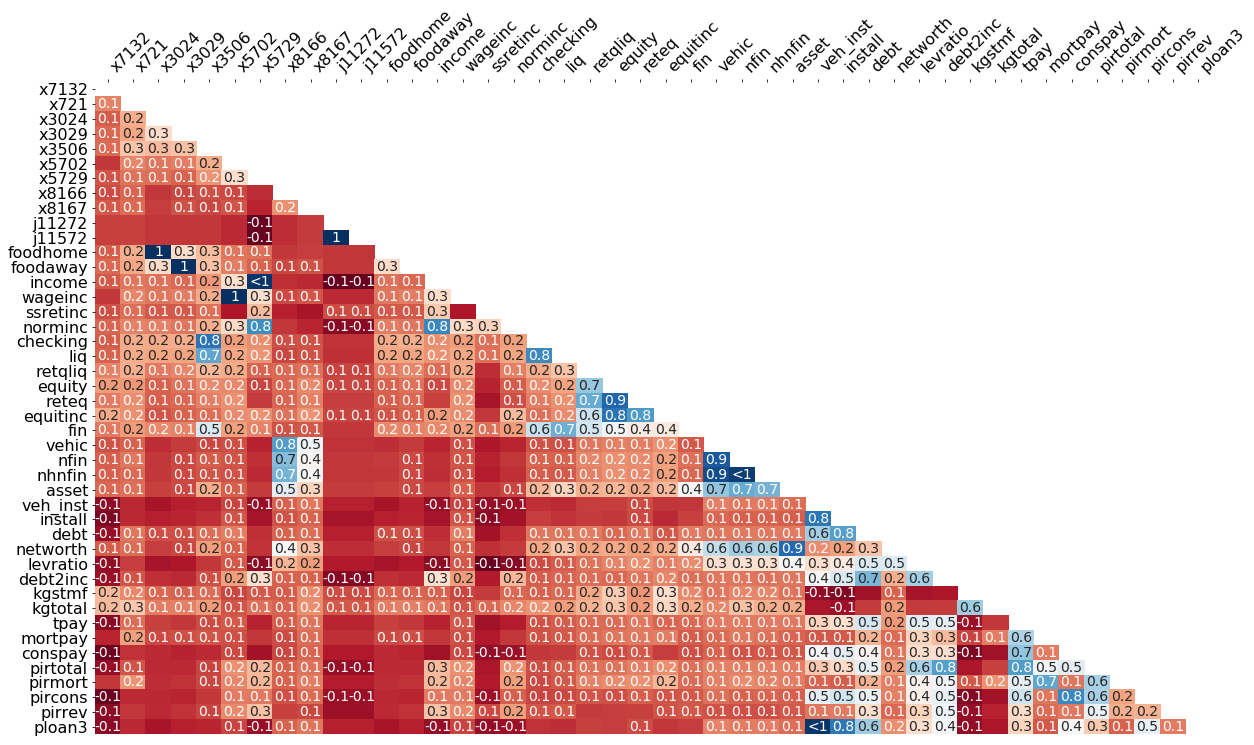

In [28]:
df_raw_data = dct_data['df_orig_data']
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', n=50, p=0.9)
msno.heatmap(filtered_data)

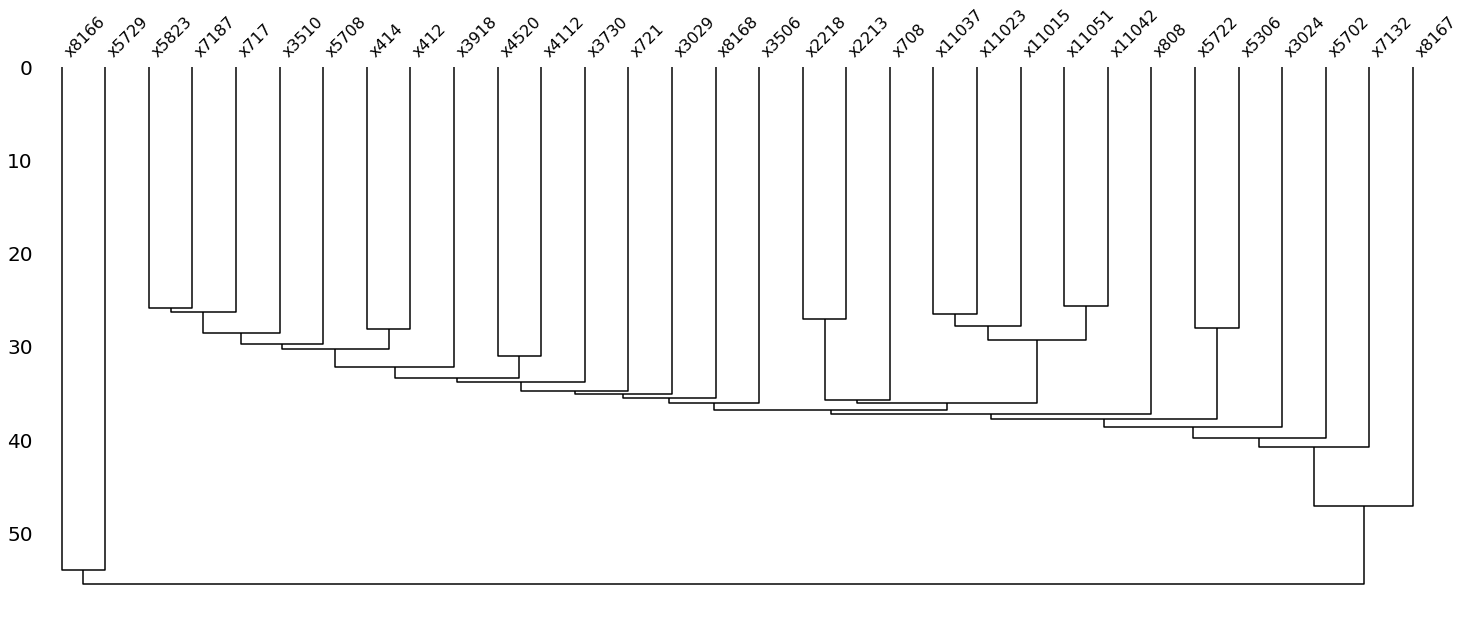

In [5]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', p=0.9)
msno.dendrogram(filtered_data)

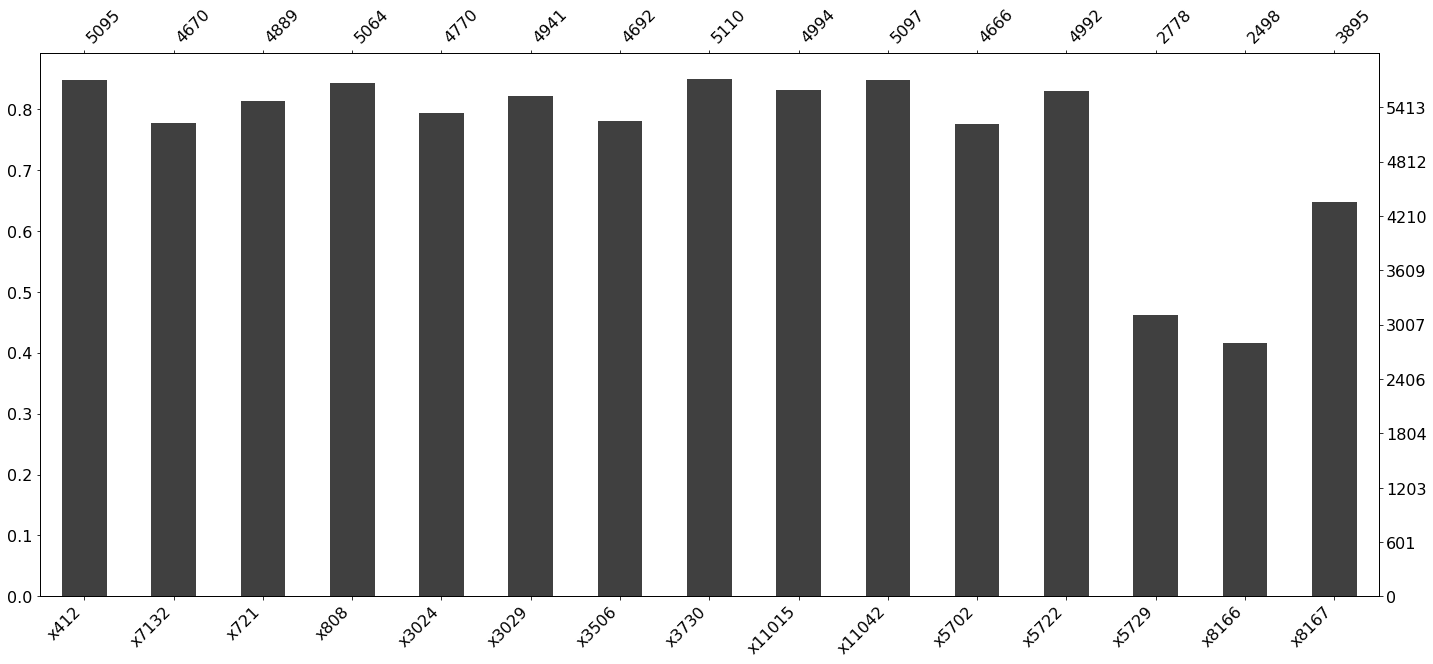

In [6]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', n=15, p=0.99) # or filter='top'
msno.bar(filtered_data)

# MSE Calculation

In [31]:
df_raw_data[['yy1', 'x1004']]

,yy1,x1004
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0


In [32]:
dct_data['df_raw_data']['x1004']

yy1
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
       ... 
5997    0.0
5998    0.0
5999    0.0
6000    0.0
6001    0.0
6002    0.0
6003    0.0
6004    0.0
6005    0.0
6006    0.0
6007    0.0
6008    0.0
6009    0.0
6010    0.0
6011    0.0
6012    0.0
6013    0.0
6014    0.0
6015    0.0
6016    0.0
6017    0.0
6018    0.0
6019    0.0
6020    0.0
6021    0.0
6022    0.0
6023    0.0
6024    0.0
6025    0.0
6026    0.0
Name: x1004, Length: 6015, dtype: float64

In [33]:
df_raw_data, df_col_mu_std = impute.scale(dct_data['df_raw_data'], dct_data['lst_num_cols'])

In [40]:
pd.read_csv('data/xgboost_imputed_100.csv', index_col=0).loc[1,]

x100     0.0
x1002    NaN
x1004    NaN
x1005    NaN
x1006    NaN
x1007    NaN
x1008    NaN
x1009    0.0
x101     NaN
x1011    0.0
x1012    NaN
x1013    NaN
x1014    0.0
x1015    NaN
x1016    NaN
x1017    0.0
x1018    0.0
x102     0.0
x1020    0.0
x103     0.0
x1032    0.0
x1034    NaN
x1035    NaN
x1036    0.0
x1037    NaN
x1038    NaN
x1039    NaN
x104     NaN
x1040    NaN
x1041    0.0
        ... 
x9212    0.0
x9214    0.0
x9215    0.0
x9216    0.0
x9217    0.0
x9219    0.0
x9220    0.0
x9225    0.0
x9226    0.0
x9227    0.0
x9228    0.0
x9229    0.0
x9230    0.0
x9236    0.0
x9237    0.0
x9238    0.0
x9239    0.0
x9247    0.0
x9248    0.0
x9249    0.0
x9250    0.0
x9251    0.0
x9258    0.0
x9259    0.0
x9260    0.0
x9261    0.0
x9262    0.0
x9263    0.0
x9264    0.0
x931     0.0
Name: 1, Length: 2575, dtype: float64

In [36]:
impute.descale(pd.read_csv('data/xgboost_imputed_100.csv', index_col=0), df_col_mu_std, dct_data['lst_num_cols'])['x1004']

yy1
1                NaN
2       1.136868e-13
3       1.136868e-13
4       1.136868e-13
5       1.136868e-13
6       1.136868e-13
7       1.136868e-13
8       1.136868e-13
9       1.136868e-13
10      1.136868e-13
11      1.136868e-13
12      1.136868e-13
13      1.136868e-13
14      1.136868e-13
15      1.136868e-13
16      1.136868e-13
17      1.136868e-13
18      1.136868e-13
19      1.136868e-13
20      1.136868e-13
21      1.136868e-13
22      1.136868e-13
23      1.136868e-13
24      1.136868e-13
25      1.136868e-13
26      1.136868e-13
27      1.136868e-13
28      1.136868e-13
29      1.136868e-13
30      1.136868e-13
            ...     
5997    1.136868e-13
5998    1.136868e-13
5999    1.136868e-13
6000    1.136868e-13
6001    1.136868e-13
6002    1.136868e-13
6003    1.136868e-13
6004    1.136868e-13
6005    1.136868e-13
6006    1.136868e-13
6007    1.136868e-13
6008    1.136868e-13
6009    1.136868e-13
6010    1.136868e-13
6011    1.136868e-13
6012    1.136868e-13
6013    1

In [21]:
pd.read_csv('data/xgboost_imputed_100.csv', index_col=0)

,x100,x1002,x1004,x1005,x1006,x1007,x1008,x1009,x101,x1011,...,x9250,x9251,x9258,x9259,x9260,x9261,x9262,x9263,x9264,x931
yy1,,,,,,,,,,,,,,,,,,,,,
1,0,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,0.243820,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,-1.121709,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0
3,5,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,-1.121709,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,1,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,0.243820,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,5
5,1,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,-0.438945,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,5
6,0,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,-0.438945,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,1,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,0.926585,0.0,...,0.0,0.0,18.0,11.0,0.0,0.0,0.0,0.0,0.0,5
8,1,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,0.926585,0.0,...,0.0,0.0,0.0,11.0,13.0,0.0,0.0,0.0,0.0,0
9,0,0,-0.058253,-0.054812,-0.071208,-0.069298,-0.041959,0,-1.121709,0.0,...,0.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,0.0,0


In [63]:
df_imputed =  dct_data['xgboost_imputed_raw1'].copy()
df_imputed = df_imputed.drop(dct_data['empty_cols'] +  dct_data['lst_skipped_cols'], axis=1)

In [75]:
len([col for col in dct_data['xgboost_imputed_raw1'].columns[dct_data['xgboost_imputed_raw1'].isnull().any()] if col not in dct_data['empty_cols'] +  dct_data['lst_skipped_cols']])

719

In [100]:
dct_data['xgboost_imputed_raw100']

,x100,x1002,x1004,x1005,x1006,x1007,x1008,x1009,x101,x1011,...,x9222,x9211,x3249,x3629,x3256,x7095,x6655,x8414,x8468,x9218
yy1,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.0,0.0,0.0,0.0,0.0,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0.0,0.0,0.0,0.0,0.0,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0,0.0,0.0,0.0,0.0,0.0,0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0.0,0.0,0.0,0.0,0.0,0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0,0.0,0.0,0.0,0.0,0.0,0,4.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0,0.0,0.0,0.0,0.0,0.0,0,4.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
dct_data['df_removed_1']['x1004']

0    
Name: x1004, dtype: object

In [52]:
t = impute.descale(df_raw_data, df_col_mu_std, dct_data['lst_num_cols'])

In [61]:
[col for col in dct_data['xgboost_imputed_raw1'].columns if col not in dct_data['df_raw_data'].columns and col not in dct_data['empty_cols'] and col not in dct_data['lst_skipped_cols']]

[]

In [16]:
xgboost_vals = []
for i in range(1,5):
    df_imputed = dct_data['xgboost_imputed_raw' + str(i)].copy()
    df_imputed = scoring.prepare_for_scores(dct_data, dct_param, df_imputed, i)
    y, mse = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed, dct_data['lst_num_cols'], dct_data['df_removed_'+str(i)])
    y, m_accuracy = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed, dct_data['lst_char_cols'], dct_data['df_removed_'+str(i)])
    xgboost_vals.append([mse, m_accuracy])

Categorical columns still have NAs


/Users/manu/anaconda3/envs/gdal2/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/manu/anaconda3/envs/gdal2/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: '<' not supported between instances of 'int' and 'str'

In [103]:
df_imputed = pd.read_csv('data/knn_imputed_3.csv', index_col=0)
df_imputed['x1004']

TypeError: must be str, not int

In [11]:
y_num = pd.DataFrame(columns=('imputed', 'actual', 'row', 'col'))
y_char = pd.DataFrame(columns=['actual', 'imputed', 'col'])
for i in range(1,5):
    df_imputed = pd.read_csv('data/knn_imputed_' + str(i) + '.csv', index_col=0)
    df_imputed = scoring.prepare_for_scores(dct_data, dct_param, df_imputed, i)
    y, mse = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed, dct_data['lst_num_cols'], dct_data['df_removed_'+str(i)])
    y_num = y_num.append(y)
    y, m_accuracy = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed, dct_data['lst_char_cols'], dct_data['df_removed_'+str(i)])
    y_char = y_char.append(y)
    
print(mean_squared_error(y_num['actual'], y_num['imputed']))
print(accuracy_score(y['actual'], y['imputed']))

10.998674499283938
0.7311681222707423


In [83]:
pd.DataFrame({'t': dct_data['xgboost_imputed_raw1']['x104'], 'y':dct_data['df_raw_data']['x104']})

,t,y
yy1,,
1,3.971152e-03,5.375001e-03
2,5.375001e-03,3.552714e-15
3,3.552714e-15,3.552714e-15
4,3.552714e-15,4.700000e+01
5,4.700000e+01,3.900000e+01
6,3.900000e+01,4.800000e+01
7,4.800000e+01,3.552714e-15
8,3.552714e-15,3.900000e+01
9,3.900000e+01,3.800000e+01


In [30]:
dct_data['df_raw_data']

,x100,x1002,x1004,x1005,x1006,x1007,x1008,x1009,x101,x1011,...,x9250,x9251,x9258,x9259,x9260,x9261,x9262,x9263,x9264,x931
yy1,,,,,,,,,,,,,,,,,,,,,
1,0,0,39915.78992,14063.938631,9.678482,-1.185366,-27.916877,0,5.531052,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,3.000000,0,...,0,0,0,11,0,0,0,0,0,0
3,5,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,1.000000,0,...,0,0,0,0,0,0,0,0,0,5
4,1,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,1.000000,0,...,0,0,0,11,0,0,0,0,0,5
5,1,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,3.000000,0,...,0,0,0,11,0,0,0,0,0,5
6,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,2.000000,0,...,0,0,0,0,0,0,0,0,0,5
7,1,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,2.000000,0,...,0,0,18,11,0,0,0,0,0,5
8,1,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,4.000000,0,...,0,0,0,11,13,0,0,0,0,0
9,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,4.000000,0,...,0,0,0,13,13,0,0,0,0,0


In [21]:
dct_data['df_full_cleaned_data']['x1004'].unique()

array([ 39915.78991978,      0.        ,  36000.        ,  40000.        ,
       219000.        ,  24333.62166086,  75000.        , 100000.        ,
        40862.92022183,   8000.        ,   3000.        ,  18000.        ,
        17000.        ,  72000.        ,  50000.        , 400000.        ,
        41377.693059  ,  30937.42163032,  35000.        ,  48382.70209229,
        55000.        ,  31199.75006126,  29932.19746876,  42000.        ,
       380000.        , 150000.        , 250000.        ,  10000.        ,
       200000.        ,  40864.90099493, 120000.        , 350000.        ,
         5000.        ,  25000.        , 500000.        ,  21741.16003271,
        19000.        ,  28000.        ,  40585.18871725,  38000.        ,
        80000.        ,  70000.        ,  23818.84882368,  22856.37001019,
        60000.        , 124000.        ,  20000.        ])

In [24]:
t = pd.read_csv('data/knn_imputed_3.csv')

In [25]:
t

,yy1,x7398,x7578,x7019,x7020,x7001,x7050,x8020,x8021,x5908,...,x3628,x6706,x9240,x6825,checking,networth,agecl,race,hhsex,hdebt
0,1,3410.000000,1.0,67.0,1.0,3.0,-1.0,1.0,1.0,1958.0,...,0.0,0.0,0.0,0.0,0.000000,-4.000000e+02,4,1,1.0,True
1,2,2323.000000,1.0,76.0,1.0,1.0,-1.0,1.0,1.0,1991.0,...,0.0,0.0,0.0,0.0,500.000000,-8.971429e+03,6,1,1.0,True
2,3,7527.000000,1.0,53.0,1.0,1.0,-1.0,1.0,1.0,1959.0,...,0.0,0.0,0.0,0.0,600.000000,-2.671429e+03,4,1,1.0,True
3,4,5844.000000,5.0,1.0,2.0,3.0,-1.0,2.0,1.0,1965.0,...,0.0,0.0,0.0,0.0,3124.285714,2.040238e+06,4,1,1.0,True
4,5,4564.000000,1.0,1.0,2.0,2.0,-1.0,1.0,1.0,1956.0,...,0.0,0.0,0.0,0.0,1000.000000,6.883293e+05,3,1,1.0,True
5,6,3686.000000,1.0,76.0,1.0,1.0,1.0,1.0,2.0,1949.0,...,0.0,0.0,0.0,0.0,1214.285714,1.064286e+05,3,1,2.0,True
6,7,5385.000000,1.0,1.0,2.0,4.0,-1.0,1.0,1.0,1967.0,...,0.0,0.0,0.0,0.0,6000.000000,2.989000e+05,4,1,1.0,True
7,8,6566.000000,1.0,1.0,2.0,4.0,-1.0,1.0,1.0,1977.0,...,0.0,0.0,0.0,0.0,9000.000000,1.100080e+05,6,1,1.0,True
8,9,6019.000000,1.0,76.0,1.0,1.0,-1.0,1.0,2.0,1981.0,...,0.0,0.0,0.0,0.0,160.000000,1.488571e+03,6,2,2.0,True
9,10,4500.000000,5.0,44.0,2.0,2.0,-1.0,1.0,1.0,1980.0,...,0.0,0.0,0.0,0.0,300.000000,-1.420000e+04,6,1,1.0,True


In [14]:
t['x3628'].unique()

array([ 0., nan])

In [11]:
dct_data.keys()

dict_keys(['df_orig_data', 'df_raw_data', 'df_xvariables', 'lst_char_cols', 'lst_num_cols', 'lst_year_cols', 'lst_skipped_cols', 'df_col_structure', 'df_full_cleaned_data', 'df_removed', 'holdout_idx', 'empty_cols', 'xgboost_imputed_100', 'xgboost_imputed_raw100', 'df_missing_probabilities', 'df_missing_indicators', 'lst_cols_to_withhold', 'dct_withhold_sets', 'df_removed_1', 'df_removed_2', 'df_removed_3', 'df_removed_4', 'df_removed_5', 'xgboost_imputed_raw1', 'xgboost_imputed_1'])

In [23]:
df_imputed_2 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_2.csv'), 2)
y, mse_2 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_2, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_2 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_2, dct_data['lst_char_cols'], dct_data['df_removed'])

In [24]:
df_imputed_3 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_3.csv'), 3)
y, mse_3 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_3, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_3 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_3, dct_data['lst_char_cols'], dct_data['df_removed'])

In [26]:
df_imputed_4 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_4.csv'), 4)
y, mse_4 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_4, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_4 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_4, dct_data['lst_char_cols'], dct_data['df_removed'])

In [ ]:
df_imputed_5 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_5.csv'), 5)
y, mse_5 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_5, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_5 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_5, dct_data['lst_char_cols'], dct_data['df_removed'])

In [27]:
xgboost_scores = pd.DataFrame({'mse': [mse_1, mse_2, mse_3, mse_4],
             'accuracy': [m_accuracy_1, m_accuracy_2, m_accuracy_3, m_accuracy_4]})
xgboost_scores

,accuracy,mse
0,0.966974,1.397999
1,0.966459,1.457937
2,0.966953,1.428081
3,0.965742,1.421881


# KNN

In [28]:
dct_data['full_cleaned_data'] = pd.read_csv(os.path.join('data', 'full_cleaned_old.csv'), index_col=0)
dct_data['df_removed'] = pd.read_csv(os.path.join('data', 'withheld_old.csv'), index_col=0)

In [29]:
df_knn_imputed_1 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_1.csv'), 1, False)
y, kmse_1 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_1, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_1 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_1, dct_data['lst_char_cols'], dct_data['df_removed'])

In [30]:
df_knn_imputed_2 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_2.csv'), 2, False)
y, kmse_2 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_2, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_2 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_2, dct_data['lst_char_cols'], dct_data['df_removed'])

In [37]:
df_knn_imputed_3 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_3.csv'), 3, False)
y, kmse_3 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_3, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_3 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_3, dct_data['lst_char_cols'], dct_data['df_removed'])

In [38]:
df_knn_imputed_4 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_4.csv'), 4, False)
y, kmse_4 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_4, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_4 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_4, dct_data['lst_char_cols'], dct_data['df_removed'])

In [39]:
df_knn_imputed_5 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_5.csv'), 5, False)
y, kmse_5 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_5, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_5 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_5, dct_data['lst_char_cols'], dct_data['df_removed'])

In [40]:
knn_scores = pd.DataFrame({'mse': [kmse_1, kmse_2, kmse_3, kmse_4],
             'accuracy': [km_accuracy_1, km_accuracy_2, km_accuracy_3, km_accuracy_4]})
knn_scores

,accuracy,mse
0,0.901264,1.138380
1,0.901264,1.138059
2,0.901264,1.138386
3,0.901264,1.138362


In [41]:
from collections import OrderedDict
pd.DataFrame(OrderedDict( {'method': ['xGBoost', 'kNN'],
              'mse': [xgboost_scores['mse'].mean(),knn_scores['mse'].mean()],
              'accuracy': [xgboost_scores['accuracy'].mean(),knn_scores['accuracy'].mean()]}))

,method,mse,accuracy
0,xGBoost,1.426474,0.966532
1,kNN,1.138297,0.901264


In [5]:
df_missing_probabilities = pd.read_csv(os.path.join('data', 'missing_probabilities.csv'), index_col=0)

In [9]:
df_missing_indicators = pd.read_csv(os.path.join('data', 'missing_indicator.csv'), index_col=0)

In [12]:
df_missing_probabilities.loc[df_missing_indicators['x1011'] == 0]['x1011'].unique()

array([0.04179078, 0.30835754, 0.09058778])

In [19]:
df_missing_probabilities.loc[df_missing_indicators['x1011'] == 1]['x1011'].quantile(0.5)

0.308357537

In [23]:
df_missing_probabilities.loc[(df_missing_indicators['x1011'] == 0) and (df_missing_probabilities['x1011'] >= 0.308357537)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [24]:
df_imputed = dct_data['knn_imputed_raw100']

In [23]:
list(dct_data.keys())

['df_orig_data',
 'df_raw_data',
 'df_xvariables',
 'lst_char_cols',
 'lst_num_cols',
 'lst_year_cols',
 'lst_skipped_cols',
 'df_col_structure',
 'df_full_cleaned_data',
 'df_removed',
 'holdout_idx',
 'empty_cols',
 'xgboost_imputed_5',
 'knn_imputed_100',
 'knn_imputed_raw100',
 'df_missing_probabilities',
 'df_missing_indicators',
 'lst_cols_to_withhold',
 'dct_withhold_sets',
 'df_removed_1',
 'df_removed_2',
 'df_removed_3',
 'df_removed_4',
 'df_removed_5',
 'knn_imputed_raw1',
 'knn_imputed_1']

In [25]:
missing_columns = df_imputed.columns[df_imputed.isnull().any()]

In [26]:
[col for col in missing_columns if col not in dct_data['lst_skipped_cols']]

[]

In [7]:
df_removed_2 = pd.read_csv('data/withheld_2.csv')

In [20]:
len([item[1] for item in dct_data['dct_withhold_sets'].values() if len(item) >= 2])

469

In [9]:
df_removed_1.columns[~df_removed_2.isnull().all()]

Index(['x1008', 'x1011', 'x1012', 'x11008', 'x11011', 'x11012', 'x11015',
       'x11018', 'x11020', 'x11023',
       ...
       'x8495', 'x908', 'x9082', 'x9102', 'x9114', 'x9115', 'x9136', 'x9145',
       'x9260', 'x9261'],
      dtype='object', length=559)

In [ ]:
t = pd.DataFrame({'t':[1,2,3,4,5,6],
                  )